In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import math

In [40]:
data = pd.read_csv('../hypothesis', header=None, delimiter=' ')

In [41]:
%%time

X_dist = []
Y_signal = []

for i in range(len(data)):
    x_t = data.iat[i, 0]
    y_t = data.iat[i, 1]
#     if (x_t, y_t) != (4, 4):
#         continue
    x_s = data.iat[i, 2]
    y_s = data.iat[i, 3]
    dist = math.sqrt((x_t-x_s)**2 + (y_t-y_s)**2)
 
    signal = data.iloc[i, 4]
    X_dist.append(dist)
    Y_signal.append(signal)

CPU times: user 3.62 ms, sys: 0 ns, total: 3.62 ms
Wall time: 3.85 ms


82 82


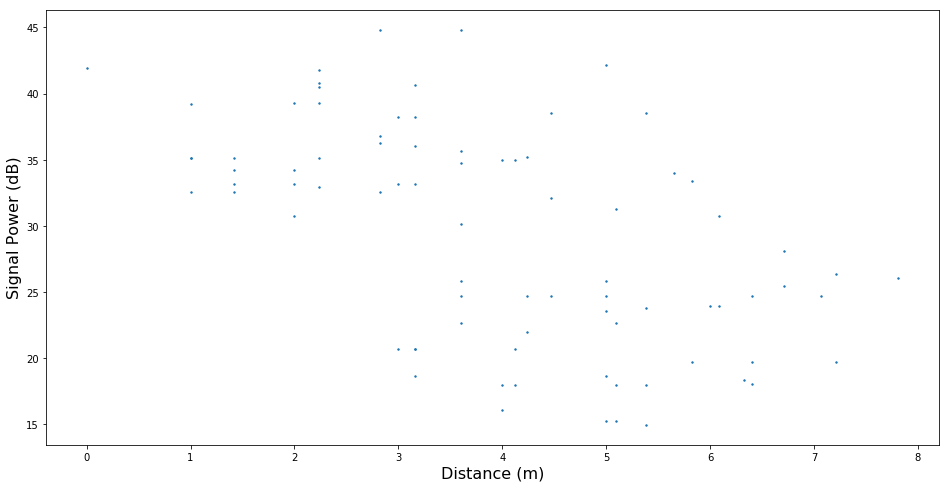

In [42]:
plt.figure(figsize=(16, 8))
print(len(X_dist), len(Y_signal))
plt.scatter(X_dist, Y_signal, s=2)
plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()

1666 1666


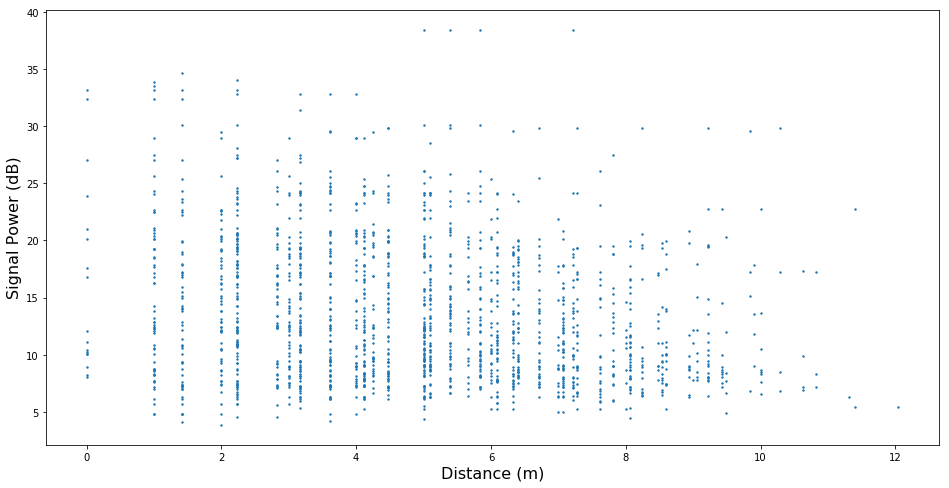

In [8]:
plt.figure(figsize=(16, 8))
print(len(X_dist), len(Y_signal))
plt.scatter(X_dist, Y_signal, s=2)
plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()

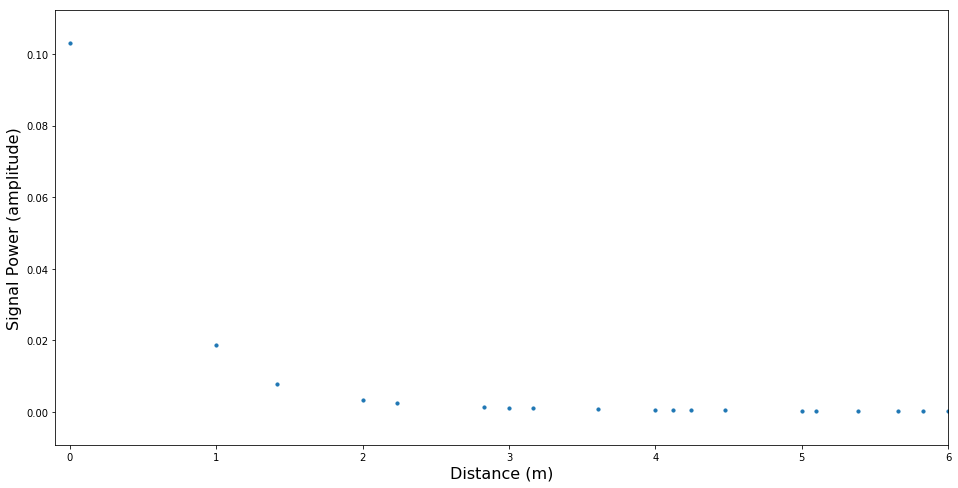

In [36]:
plt.figure(figsize=(16, 8))
plt.scatter(X_dist, db_2_amplitude_(Y_signal), s=10)
plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (amplitude)', fontsize=16)
plt.xlim([-0.1, 6])
plt.show()

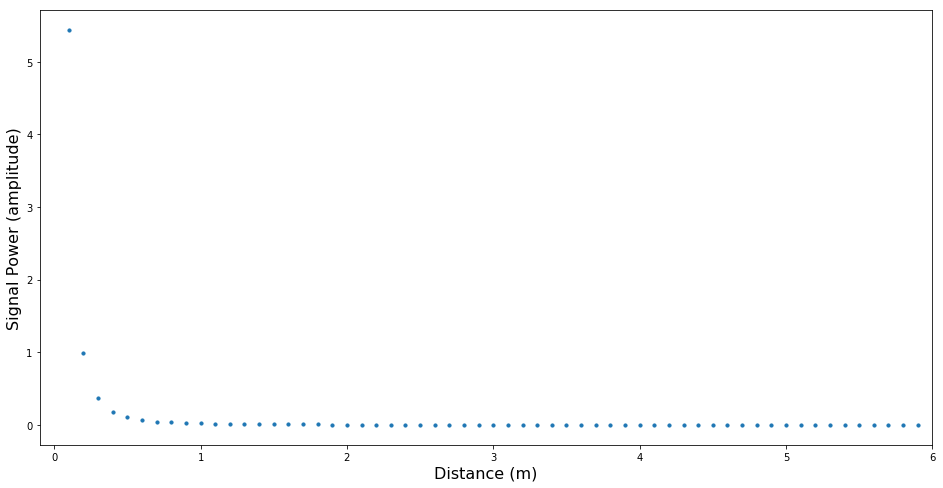

In [48]:
X_dist = np.arange(0.1, 6, 0.1)
Y_signal = amp(X_dist)
plt.figure(figsize=(16, 8))
plt.scatter(X_dist, Y_signal, s=10)
plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (amplitude)', fontsize=16)
plt.xlim([-0.1, 6])
plt.show()

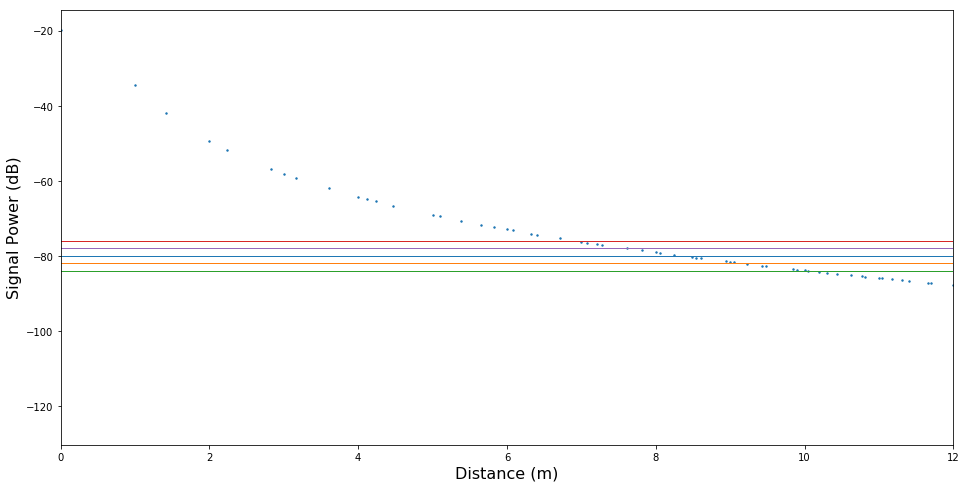

In [5]:
Y_80 = [-80] * len(X_dist)
Y_82 = [-82] * len(X_dist)
Y_84 = [-84] * len(X_dist)
Y_78 = [-78] * len(X_dist)
Y_76 = [-76] * len(X_dist)


plt.figure(figsize=(16, 8))
plt.scatter(X_dist, Y_signal, s=2)
plt.plot(X_dist, Y_80, linewidth=1)
plt.plot(X_dist, Y_82, linewidth=1)
plt.plot(X_dist, Y_84, linewidth=1)
plt.plot(X_dist, Y_76, linewidth=1)
plt.plot(X_dist, Y_78, linewidth=1)
plt.xlim([0, 12])
plt.xlabel('Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()

In [17]:
def amplitute_2_db_(abso):
    '''Transform the decibal signal strength into absolute value of iq samples
       y = 20*log10(x)
       where y is power in dB and x is the absolute value of iq samples
    '''
    return 20*np.log10(abso)


def db_2_amplitute_(db):
    '''Transform the decibal signal strength into absolute value of iq samples
       x = 10^(y/20)
       where y is power in dB and x is the absolute value of iq samples
    '''
    return np.power(10, np.array(db)/20)

In [3]:
def power_2_db_(abso):
    '''Transform the decibal signal strength into absolute value of iq samples
       y = 10*log10(x)
       where y is power in dB and x is the absolute value of iq samples
    '''
    return 10*np.log10(abso)


def db_2_power_(db):
    '''Transform the decibal signal strength into absolute value of iq samples
       x = 10^(y/10)
       where y is power in dB and x is the absolute value of iq samples
    '''
    return np.power(10, np.array(db)/10)

In [14]:
def db(distance):
    return -34.56273667778001 - 49.274881540394276 * np.log10(distance)

In [7]:
def amp(distance):
    return np.power(10, -34.56273667778001/20) * np.power(distance, -49.274881540394276/10)

In [16]:
db(math.sqrt(5))

-51.78356875975311

In [3]:
power_2_db_(5.1168236437093335e-06)

-52.90999551150563

In [4]:
power_2_db_(1.4000167325422443e-06)

-58.53866773745091

In [3]:
power_2_db_(db_2_power_(-60) + db_2_power_(-65))

-58.80668951933905

In [4]:
power_2_db_(db_2_power_(-60) + db_2_power_(-60))

-56.98970004336019

In [17]:
db_2_power_(-30), db_2_power_(-28), db_2_power_(-32)

(0.001, 0.001584893192461114, 0.000630957344480193)

In [7]:
power_2_db_(db_2_power_(-58) + db_2_power_(-63))

-56.806689519339045

In [12]:
np.power(norm(0, 1).pdf(1.5), 11)

1.720348806408774e-10

In [20]:
amplitute_2_db_(db_2_amplitute_(-50) + db_2_amplitute_(-52))

-44.92196217912266

In [60]:
amp(1)

0.018700928342558366

In [71]:
def delta(R):
    small = math.sqrt(2)/2 * R
    large = (2-math.sqrt(2)/2) * R
    
    sig_small = db(small)
    sig_large = db(large)
    
    #sig_small = []
    #sig_large = []
    #for dist, sig in zip(X_dist, Y_signal):
        #if dist > math.floor(small) and dist < math.ceil(small):
        #    sig_small.append(sig)
        #if dist > math.floor(large) and dist < math.ceil(large):
        #    sig_large.append(sig)
    
    #sig_small = np.mean(sig_small)
    #sig_large = np.mean(sig_large)
    
    new = power_2_db_(db_2_power_(sig_small) + db_2_power_(sig_large)) 
    delta = new - sig_small
    print(R, sig_small, sig_large, new, delta)
    return delta

1 -27.14612798955597 -40.05997341529285 -26.929593023063347 0.21653496649262394
2 -41.97934536600405 -54.89319079174093 -41.76281039951142 0.21653496649262394
3 -50.656221296271625 -63.5700667220085 -50.439686329779 0.21653496649262394
4 -56.81256274245213 -69.72640816818901 -56.5960277759595 0.21653496649263104
5 -61.58779215350217 -74.50163757923906 -61.37125718700954 0.21653496649263104
6 -65.4894386727197 -78.40328409845658 -65.27290370622707 0.21653496649263104
7 -68.78823380127785 -81.70207922701474 -68.57169883478522 0.21653496649263104
8 -71.6457801189002 -84.55962554463707 -71.42924515240757 0.21653496649263104
9 -74.16631460298728 -87.08016002872415 -73.94977963649465 0.21653496649263104
10 -76.42100952995025 -89.33485495568712 -76.20447456345762 0.21653496649263104
11 -78.46062918776062 -91.37447461349751 -78.24409422126799 0.21653496649263104
12 -80.32265604916778 -93.23650147490466 -80.10612108267514 0.21653496649263104
13 -82.03555471718505 -94.94940014292192 -81.81901975

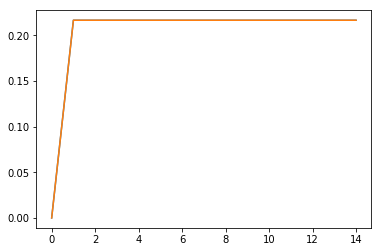

In [73]:
X = [0]
Y = [0]
for i in range(1, 15):
    X.append(i)
    Y.append(delta(i))
    
plt.plot(X, Y)
plt.show()

In [55]:
array = np.array(X_dist)

In [30]:
for dist, sig in zip(X_dist, Y_signal):
    if sig>=-91 and sig <= -90:
        print(dist, sig)

13.416407864998739 -90.12687944291687
13.92838827718412 -90.92831629289057
13.601470508735444 -90.42004585217478
13.341664064126334 -90.00732619273235
13.892443989449804 -90.87301950535027
13.45362404707371 -90.18615884426269


In [77]:
Y_signal.sort()

In [79]:
Y_signal[-5:]

[-51.783568759753116,
 -49.395954054228106,
 -41.97934536600405,
 -34.562736677780016,
 -19.729519301331923]

/home/wings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/wings/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


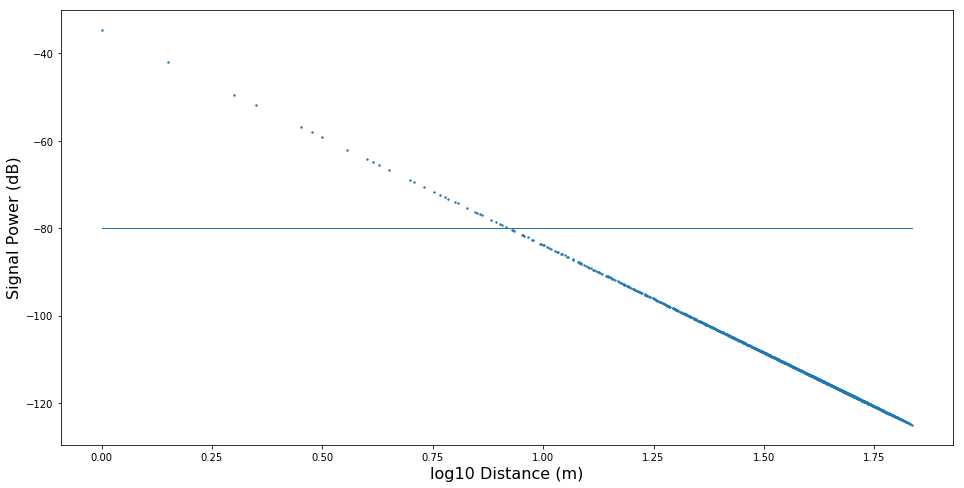

In [32]:
plt.figure(figsize=(16, 8))
plt.scatter(np.log10(X_dist), Y_signal, s=2)
plt.plot(np.log10(X_dist), Y_80, linewidth=1)
plt.xlabel('log10 Distance (m)', fontsize=16)
plt.ylabel('Signal Power (dB)', fontsize=16)
plt.show()

In [6]:
arr = np.zeros(5, dtype=int)

In [8]:
arr[0] = arr[3] = 1

In [9]:
arr

array([1, 0, 0, 1, 0])

In [14]:
np.where(arr<1, arr, -1)

array([-1,  0,  0, -1,  0])

In [22]:
arr = list(range(6))

In [27]:
len(np.unique([1, 1, 1, 2, 2, 3]))

3

In [20]:
arr.remove(4)

In [21]:
arr

[0, 1, 2, 3, 5]

In [31]:
alist = [1, 2, 3]
blist = [4, 5]

In [33]:
alist.extend(blist)

In [34]:
alist

[1, 2, 3, 4, 5]

In [35]:
alist

[1, 2, 3, 4, 5]

In [38]:
for a, b in enumerate(blist):
    print(a, b)

0 4
1 5


In [11]:
power_2_db_(db_2_power_(-50) + db_2_power_(-52))

-47.8755739720566

In [3]:
db(8.3*0.905)

-77.7140646817112

In [90]:
amplitude_2_db_(db_2_amplitude_(-80)*2)

-73.97940008672037

In [89]:
power_2_db_(db_2_power_(-80)*2)

-76.98970004336019